# First ML Model: Decision Tree

   * This short notebook will show you how easy to build a decision tree using sklearn
   

   * This notebook will demonstrate the major steps for building a decision tree.
 
 
   * We are going to use Python/Pandas and Scikit-Learn 
 
 
   * We are going to use iris dataset to build a decision tree. 
     
<img src='./images/iris.jpg' style='width:500px;height:200px' />


##  Machine Learning Pipeline:
 0. prepare data
 1. build a model
 2. train the model
 3. test the model, make prediction using test data
 4. evaluate 
<img src='./images/ML_pipeline.png' />

#### Before we start, we need to import several modules.

In [1]:
# we use pandas for data preprocessing
import pandas as pd

# we need split API from sklearn to split the data set into train/test
from sklearn.model_selection import train_test_split

# we need to Load libraries and use Tree model
from sklearn.tree import DecisionTreeClassifier

# we alos need scikit-learn metrics module for accuracy calculation
from sklearn import metrics                


###  0. prepare data
 (a) load data from internet url into memory as a dataframe

In [2]:
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url, header=0)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


 (b) get features

In [3]:
#  we take the first four columns as features
X = df.iloc[:,0:4 ]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


 (c) take the last column as target

In [4]:
#  get target and convert to number 0, 1, 2
y = df.iloc[:, -1].map({'setosa':0, 'versicolor':1, 'virginica': 2})
y.head()


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

 (d) split data into training and testing sets (80/20)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### 1.  Use decision tree classifier

In [6]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2. Train model

In [7]:
model = model.fit(X_train, y_train)

### 3. test the model to get prediction

In [8]:
y_pred = model.predict(X_test)
print(y_pred)

[2 0 0 1 2 0 2 0 2 1 2 2 0 0 1 2 0 2 2 1 0 0 2 1 0 1 2 0 0 1]


### 4. Evaluate the model using test target

In [9]:
# find the accuracy, the correctness rate
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


Our tree model can achieve 90% above accuracy (this number might be different as random sampling applied while spliting.

Finally, we can visualiza the tree model

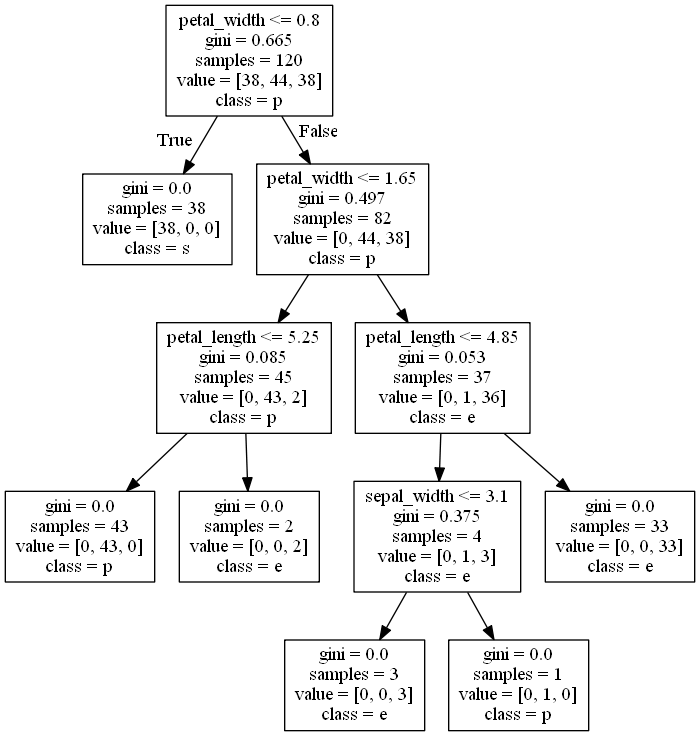

In [10]:
# display
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=y_train.name)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


# END